<img src='img/fastcamp_h.png'>

# 7강. Convolutional Neural Network(CNN) Motivation

# 이번장에서 배우는 것들
* Image classification (gray image)
* Multi-class classification
* Softmax activation
* Information Gain, Entropy, Cross-Entropy, KL-Divergence

# 더욱 어려운 문제

* 딥러닝의 파급을 막던 여러가지 문제가 해결 된 뒤,
* 연구자들은 점점 어려운 문제를 더욱 깊은 모델로 해결하게 됨
* 그중 가장 먼저 대상이 된것은 이미지 인식 분야였음

# 이미지 인식 (Image classification)이란?

* 주어진 사진에 미리 tagging된 객체들이 등장했는지를 학습하여 평가하는 문제
* 과거의 경우 객체의 특징을 vector로 변환하는 기준을 domain-knowledge가 풍부한 전문가에게 맡기는 수밖에 없었음
* 딥러닝은 vector embedding 자체를 모델 스스로 만들어내기 때문에 domain-knowledge가 적어짐

<img src='img/07_02.png'>

# Mnist 데이터베이스

* 미국 국립표준기술연구소(Modified National Institute of Standards and Technology)에서 수집한 손으로 쓴 숫자 데이터
* 6만개의 학습용 이미지, 1만개의 테스트용 이미지로 구성
    * 0~9까지의 숫자로 구성
    * 가로 24 pixel, 세로 24 pixel의 사진
* 이미지 인식의 성능을 측정하는 표준 데이터베이스

<img src='img/07_03.png'>

# 이미지의 표현 형태

* 이미지는 width길이의 1차원 vector가 height만큼 쌓아져 있는 matrix의 일종
* 흑백사진의 경우 값이 255이면 white, black은 0, 회색은 둘의 사이값이라고 가정할 때, 숫자 1은 다음과 같이 표현 가능

<img src='img/07_04.png' height=50% width=50%>

# X 데이터와 Y데이터의 구성

<img src='img/07_05.png' height=50% width=50%>
<img src='img/07_06.png' height=50% width=50%>

In [1]:
#mnist 데이터셋을 사용하기 위한 import
from keras.datasets import mnist

#mnist 데이터를 세팅함
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
import matplotlib.pylab as plt
import numpy as np
plt.imshow(np.hstack(x_train[:5,]), cmap='gray')
plt.show()
print(x_train[0,10:15])
print(y_train[:5])

<Figure size 640x480 with 1 Axes>

[[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 139 253 190   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 190 253  70   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 241 225 160 108   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  81 240 253 253 119
   25   0   0   0   0   0   0   0   0   0]]
[5 0 4 1 9]


# 기존 방식의 딥러닝 모델로 mnist 문제 풀이

* 고려 사항
    * X는 28x28의 2차원 배열, 모델을 구성하기 위해 1차원으로 변경해줌
    * Y는 scalar 값, 회귀 모델로 구성하여 풀어보자
    * dropout이나 그외의 기술은 적당히 써서 구현해보자

In [3]:
print(x_train.shape, x_test.shape)
#rank 2,3의 모양을 하나로 펴줌
x_train = x_train.reshape((60000, -1))
x_test = x_test.reshape((10000, -1))
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


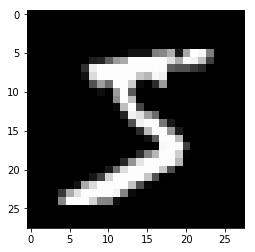

In [4]:
import matplotlib.pylab as plt
import numpy as np
#다시 2차원으로 구성하여 valid한지 확인
plt.imshow(x_train[0].reshape((28, 28)) , cmap='gray')
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_3 (Dropout)  

In [6]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.


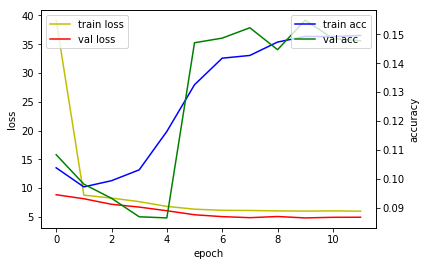

In [7]:
import matplotlib.pylab as plt

def trace(hist):
    fig, loss_ax = plt.subplots(figsize=(6,4))
    #x 죽을 공유하는 복수의 y축을 만들때 twinx를 사용
    acc_ax = loss_ax.twinx()

    #loss 축에 대하여 train과 val 세팅
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    #acc 축에 대하여 train/ val 세
    acc_ax.plot(hist.history['acc'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='upper right')

    plt.show()
trace(hist)

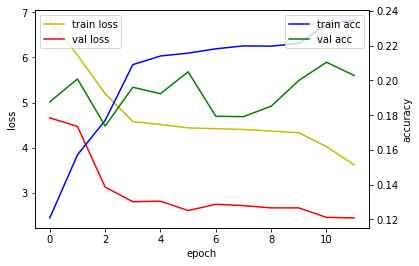

In [8]:
# x의 범위를 0~1까지로 노말라이즈
x_train = x_train/255.
x_test = x_test/255.

hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

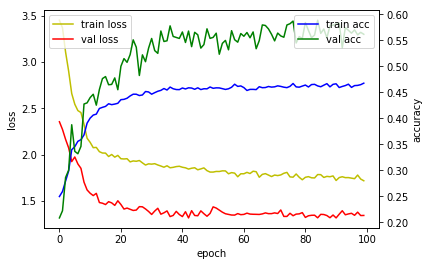

In [9]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=0, validation_data=(x_test, y_test))
trace(hist)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total para

# 생각보다 성능이 좋지 않음

* 일반적으로 회귀로 class 값을 예측하는 것은 맞지 않는 행동
* 해당 값이 5인 것을 5.2, 4.9, 4.5 등으로 예측하는 것보다
* 10칸의 vector에서 맞다고 생각하는 칸에 1을 아니라고 생각하는 칸에 0을 넣어주는 것이 더 쉬움
* 즉, y를 scalar값에서 10칸짜리 one-hot encoding으로 바꿔보자

In [11]:
from keras.utils import to_categorical

print(y_train[0], y_test[0])
print(to_categorical(y_train[0], 10), to_categorical(y_test[0], 10))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
pass

5 7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total para

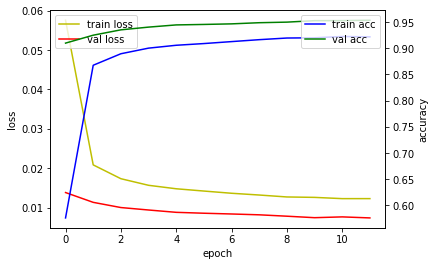

In [13]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

# Multi-class classification

* mnist, Iris에서 $Y$ vector는 각 dimension마다 서로 다른 class를 의미함
* 이런 문제를 multi-class classification문제라고 함
* sigmoid는 robust하게 마지막 layer에서 0~1을 예측하는 activation이지만 해당 문제에는 다른 activation이 효율적임

## softmax activation

<center><img src='img/07_08.png' height=30% width=30%></center>

$$ S(y_i) = \frac{e^y_i}{\sum_{j}e^y_j} \nonumber $$

## softmax activation

<center><img src='img/07_07.png' height=50% width=50%></center>

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total para

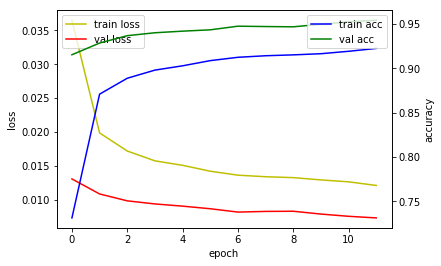

In [15]:
trace(hist)

# Cross-Entropy Loss 

* mse는 강력한 loss지만 산술적 거리에 의존적임
* softmax가 y의 정답확율을 나타낸다고 할 때, loss도 확율기반으로 평가 할 수는 없을까?

## 정보량 (information gain)

$$ I(X) = log(\frac{1}{p(x)}) \nonumber $$

* 확률적으로 발생하는 사건에 대한 정보량의 평균
* 높은 값일 수 록 희귀함
* 독립 사건일때 $I(x_1, x_2) = I(x_1) + I(x_2)$를 만족해야함, 그렇기 때문에 $log$를 취함
* 우리는 동전을 던졌을때 앞면이 나오든 뒷면이 나오든 놀라지 않음 (정보량이 작음, 발생확률 높음)
* 우리는 로또에 당첨됐을때 엄청나게 놀람 (정보량 매우 높음, 발생확률 엄청 낮음)


## 엔트로피 (Entropy)

* 특정 사건 $x$의 정보량뿐만이 아닌 $X$의 표본 공간의 모든 사건의 정보량의 평균 기대값
* $H$로 표현
* 등장확률 $P(X)$와 기대값 -log(P(x))를 곱한뒤 모두 더함으로서 X에 대한 기대값을 표현

$$ H(p) = H(X) = -\sum_{x \in X}P(x)logP(x) \nonumber $$

* $\frac{1}{2}$ 동전 던지기
  * $-{[}0.5log(0.5) + 0.5log(0.5){]} = 0.6931....$
* $\frac{1}{4}$ 동전 던지기
  * $-{[}0.25log(0.25) + 0.75log(0.75){]} = 0.562335....$
* 앞면만 나오는 동전 던지기
  * $-{[}0log(0) + 1log(1){]} = 0 $

## 크로스 엔트로피 (Cross-Entropy)

* 2개의 서로 다른 확률변수를 교차 계산 한 것
* $Cross-Entropy = H(p, q)$
   * $q$는 실제와 다른 우리가 추측한 확률 
   * $H(p,q) = -\sum_{x \in X}P(x)logQ(X)$


$$ X = \{A, B\} \nonumber $$

\begin{align}
entropy &= -{[}p(A)logp(A) +  p(B)logp(B){]} \nonumber \\
ce &= -{[}p(A)logq(A) +  p(B)logq(B){]} \nonumber \\
\end{align}

## 크로스 엔트로피 (Cross-Entropy)

\begin{align}
 p(A) &= 0.8, p(B) = 0.2 \nonumber \\
 H(p,q) &= - [ p(A) log Q(A) + p(B) logq(B) ] \nonumber \\
\end{align}

* $Q(x)$ 학습을 완전 잘못했을 때
\begin{align}
 q(A) &= 0.2, q(B) = 0.8 \nonumber \\
 &= - [ 0.8 log 0.2 + 0.2 log 0.8 ] \nonumber \\
 &= 1.33218... \nonumber \\
\end{align}

* $Q(x)$ 학습을 완전 잘됐을 때
\begin{align}
 q(A) &= 0.8, q(B) = 0.2 \nonumber \\
 &= - [ 0.8 log 0.8 + 0.2 log 0.2 ] \nonumber \\
 &= 0.500402...  \nonumber \\
\end{align}

* $Q(x)$ 과적합 됐을 때
\begin{align}
 q(A) &= 0.9, q(B) = 0.1 \nonumber \\
 &= - [ 0.8 log 0.9 + 0.2 log 0.1 ] \nonumber \\
 &= 0.544805...  \nonumber \\
\end{align}

# 크로스 엔트로피 (Cross-Entropy)

<center><img src='img/07_09.png' height=50% width=50%></center>

## KL divergence

* P(X)와 Q(X)가 얼마나 유사한가를 측정

\begin{align}
 D_{kl}(P||Q) &=  H(P,Q) - H(P) \nonumber \\
 &=  −[𝑝(𝐴)𝑙𝑜𝑔𝑄(𝐴)+𝑝(𝐵)𝑙𝑜𝑔𝑞(𝐵)] - (−[𝑝(𝐴)𝑙𝑜𝑔p(𝐴)+𝑝(𝐵)𝑙𝑜𝑔p(𝐵)]) \nonumber \\
\end{align}

* 𝑞(𝐴)=0.2,𝑞(𝐵)=0.8 일때
 * $= 0.831777...$
<br><br>
* 𝑞(𝐴)=0.8,𝑞(𝐵)=0.2 일때
 * $= 0$
<br><br>
* 𝑞(𝐴)=0.9,𝑞(𝐵)=0.1 일때
 * $= 0.0444...$

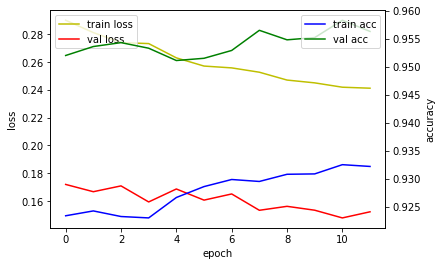

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0, validation_data=(x_test, y_test))
trace(hist)

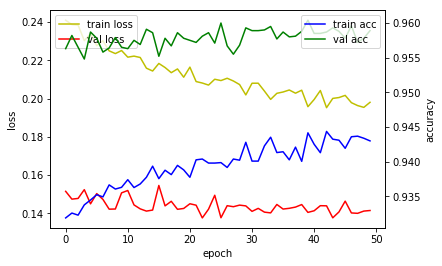

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=0, validation_data=(x_test, y_test))
trace(hist)

In [27]:
print('error rate:', 1-model.evaluate(x=x_test, y=y_test)[-1])

10000/10000 [==============================] - 0s 29us/step
error rate: 0.041100000000000025


<img src='img/07_01.png'>

# 직접만든 데이터로 테스트

In [19]:
import imageio
my_image_2 = imageio.imread('data/mnist_draw/2.png')
print(my_image_2.shape)

(28, 28, 3)


(28, 28)


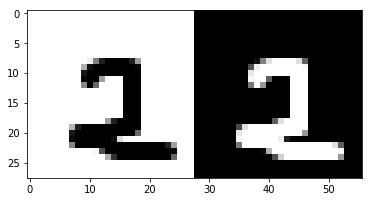

In [20]:
my_image_2 = imageio.imread('data/mnist_draw/2.png', as_gray=True)
print(my_image_2.shape)
plt.imshow(np.hstack([my_image_2, np.abs(my_image_2 - 255)]), cmap='gray')

Y shape: (1, 10)


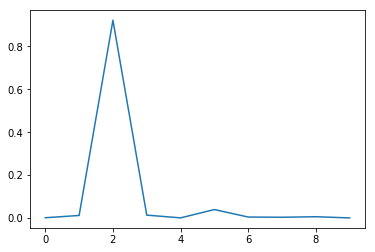

Y argmax: 2


In [21]:
def predictor(img, model):
    x = np.abs(np.expand_dims(img.reshape(-1), axis=0) - 255) / 255.
    Y = model.predict(x)
    return Y

Y = predictor(my_image_2, model)
print('Y shape:', Y.shape)

plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

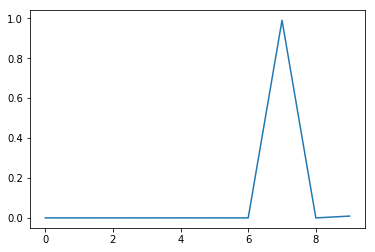

Y argmax: 7


In [22]:
my_image_7 = imageio.imread('data/mnist_draw/7.png', as_gray=True)
Y = predictor(my_image_7, model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

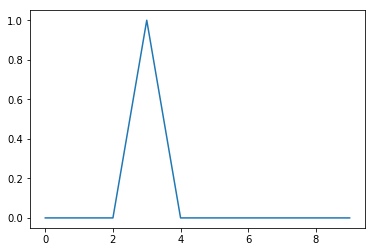

Y argmax: 3


In [23]:
Y = predictor(np.abs(my_image_7 - 255), model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

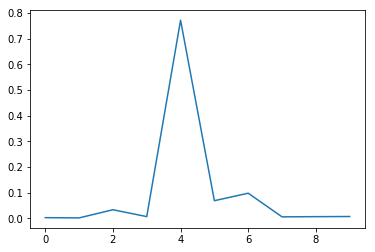

Y argmax: 4


In [24]:
my_image_4 = imageio.imread('data/mnist_draw/4.png', as_gray=True)
Y = predictor(my_image_4, model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))

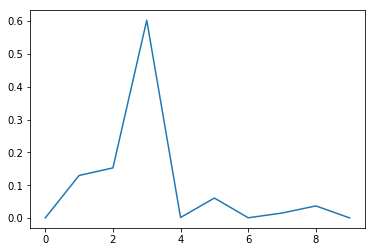

Y argmax: 3


In [25]:
my_image_4 = imageio.imread('data/mnist_draw/4_corner.png', as_gray=True)
Y = predictor(my_image_4, model)
plt.plot(Y[0])
plt.show()
print('Y argmax:', np.argmax(Y[0]))